## Operation

In [49]:
import numpy as np

In [50]:
class Operation:
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)

    def compute(self):
        pass

In [51]:
class add(Operation):
    def __init__(self, x, y):
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [52]:
class multiply(Operation):
    def __init__(self, x, y):
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [53]:
class matmul(Operation):
    def __init__(self, x, y):
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)

In [54]:
class Placeholder:
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [55]:
class Variable:
    def __init__(self, initial_value = None):
        self.value = initial_value
        self.output_nodes = []
        _default_graph.variables.append(self)

In [56]:
class Graph:
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [57]:
g = Graph()

In [58]:
g.set_as_default()

In [59]:
A = Variable(10)

In [60]:
b = Variable(1)

In [61]:
x = Placeholder()

In [157]:
y = multiply(A, x)

In [153]:
z = add(y, b)

In [154]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [141]:
class Session:
    
    def run(self, operation, feed_dict = {}):
        """ 
          operation: The operation to compute
          feed_dict: Dictionary mapping placeholders to input values (the data)  
        """
        
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]

                 
                node.output = node.compute(*node.inputs)
                
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output

In [66]:
sess = Session()

In [67]:
result = sess.run(operation=z, feed_dict={x:10})

In [68]:
result

101

In [155]:
g = Graph()

g.set_as_default()

A = Variable([[10, 20], [30, 40]])

b = Variable([1, 2])

x = Placeholder()

y = matmul(A, x)

z = add(y, b)

In [74]:
sess = Session()

In [75]:
result = sess.run(operation=z, feed_dict={x:10})

In [76]:
result

array([[101, 202],
       [301, 402]])

# Classification
## Activation function

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [82]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

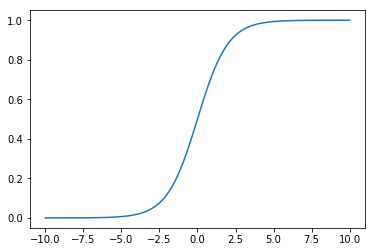

In [83]:
plt.plot(sample_z, sample_a)

In [125]:
class Sigmoid(Operation):
    def __init__(self, z):
        super().__init__([z])
    
    def compute(self, z_val):
        return 1 / (1 + np.exp(-z_val))

In [85]:
from sklearn.datasets import make_blobs

In [100]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

In [101]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [102]:
type(data)

tuple

In [103]:
features = data[0]
labels = data[1]

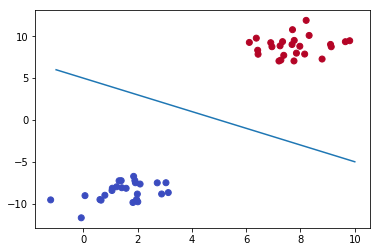

In [112]:
x = np.linspace(-1, 10, 10)
y = -x + 5

plt.scatter(features[:,0], features[:,1], c=labels, cmap="coolwarm")
plt.plot(x, y)

## (1, 1) * f - 5 = 0

In [126]:
np.array([1, 1]).dot(np.array([[8], [10]])) - 5

array([13])

In [127]:
np.array([1, 1]).dot(np.array([[2], [-10]])) - 5

array([-13])

In [158]:
g = Graph()

In [159]:
g.set_as_default()

In [160]:
x = Placeholder()

In [161]:
w = Variable([1, 1])

In [162]:
b = Variable(-5)

In [163]:
z = add(matmul(w, x), b)

In [164]:
a = Sigmoid(z)

In [165]:
sess = Session()

In [166]:
sess.run(operation=a, feed_dict={x:[8, 10]})

0.999997739675702

In [167]:
sess.run(operation=a, feed_dict={x:[2, -10]})

2.2603242979035746e-06